# Convolutional Neural Network: Fashion-MNIST 

This is not the same as the regular MNIST dataset

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import os
os.chdir('C:\\Users\\nickj\\jupyter notebooks')

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion',one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


## Labels

| Label | Description | 
| :---: | :---: | 
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|



## Sample Images

In [6]:
train_labels_numeric = np.argmax(data.train.labels, axis=1)

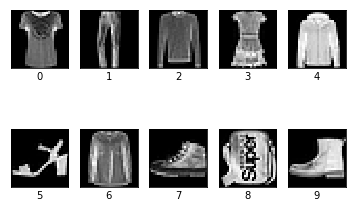

In [7]:
fig, axes = plt.subplots(2, 5)

for i, ax in enumerate(axes.flat):
    index = tuple(train_labels_numeric).index(i)
    ax.imshow(data.train.images[index].reshape(28,28),cmap='gist_gray')

    xlabel = i
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [8]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [9]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [10]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [11]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [12]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [13]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Placeholders

In [14]:
data.train.images.shape[1]

784

In [15]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [16]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

### Layers

In [53]:
x_image = tf.reshape(x,[-1,28,28,1])

In [54]:
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [55]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [56]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [57]:
full_layer_two = tf.nn.relu(normal_full_layer(full_layer_one,1024))

### Dropout

In [58]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_two,keep_prob=hold_prob)

In [59]:
y_pred = normal_full_layer(full_one_dropout,10)

### Cost Function

In [60]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [61]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [62]:
init = tf.global_variables_initializer()

In [63]:
%%time
steps = 5000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = data.train.next_batch(512)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            print('Train Accuracy is:'+str(sess.run(acc,feed_dict={x:data.train.images,y_true:data.train.labels,hold_prob:.5})))           
            print('Test Accuracy is:'+str(sess.run(acc,feed_dict={x:data.test.images,y_true:data.test.labels,hold_prob:1.0})))

            print('\n')

Currently on step 0
Train Accuracy is:0.119018
Test Accuracy is:0.164


Currently on step 100
Train Accuracy is:0.744618
Test Accuracy is:0.8063


Currently on step 200
Train Accuracy is:0.799109
Test Accuracy is:0.8309


Currently on step 300
Train Accuracy is:0.825982
Test Accuracy is:0.8471


Currently on step 400
Train Accuracy is:0.840945
Test Accuracy is:0.8589


Currently on step 500
Train Accuracy is:0.848255
Test Accuracy is:0.8651


Currently on step 600
Train Accuracy is:0.855509
Test Accuracy is:0.8626


Currently on step 700
Train Accuracy is:0.865509
Test Accuracy is:0.8694


Currently on step 800
Train Accuracy is:0.875073
Test Accuracy is:0.8752


Currently on step 900
Train Accuracy is:0.877055
Test Accuracy is:0.873


Currently on step 1000
Train Accuracy is:0.881127
Test Accuracy is:0.8799


Currently on step 1100
Train Accuracy is:0.887164
Test Accuracy is:0.8836


Currently on step 1200
Train Accuracy is:0.890455
Test Accuracy is:0.8842


Currently on step 1300
Tra

## Our final accuracy is 91%, according to [this Github page](https://github.com/zalandoresearch/fashion-mnist) Human Performance is only 83.5%.  